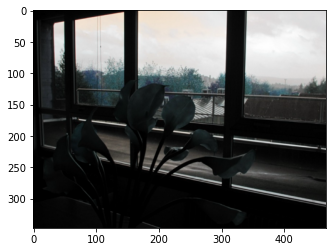

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Reading image

img = cv2.imread('input_1.png')
plt.imshow(img)
plt.show()

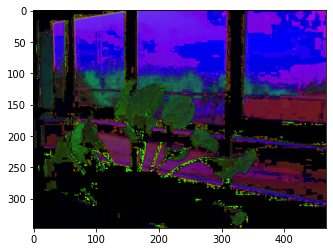

In [4]:
#From RGB to HSV


hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.show()

In [9]:
value = hsv[:,:,2]

#Calculate the fft of the Intensity (Value)

DFT2d_Value = np.fft.fft2(value)
print(value.shape)

(347, 467)


In [10]:
#Calculate the Gaussian


M, N = value.shape
sigma = 4   

Nr = np.fft.fftshift((-M / 2) ((M / 2) - 1))
Nc = np.fft.ifftshift((-N / 2), ((N / 2) - 1))

dft_gauss_kernel = exp(-2 * sigma ^ 2 * np.pi ^ 2 * ((Nr / M) ^ 2 + (Nc / N ) ^ 2))

TypeError: 'float' object is not iterable

In [11]:
#Convolution of the Gaussian_fft and the value_fft

DFT2d_Value_convolved = np.convolve(DFT2d_Value, dft_gauss_kernel)

NameError: name 'dft_gauss_kernel' is not defined

In [12]:
#Calculate the inverse, and take the real values

value_convolved = np.fft.ifft2(DFT2d_Value_convolved)
mValue = np.abs(value_convolved)

NameError: name 'DFT2d_Value_convolved' is not defined

In [15]:
#Application of the LCC formula

#M, N = value.shape

output = np.zeros(M, N, 3)
for i in range(1, M):
    for j in range(1, N):
        output[i, j, 2] = (value[i, j]) ^ (2 ^ (2 * mValue[i, j] - 1))

TypeError: Cannot interpret '467' as a data type

In [16]:
#Output will have the same Hue and Saturation, and we change only the Value

output[:, :, 1] = hsv[:, :, 1]
output[:, :, 0] = hsv[:, :, 0]

#From HSV to RGB:

output = cv2.cvtColor(output, cv2.COLOR_BGR2HSV)

NameError: name 'output' is not defined